# 1. Загрузка и первичный осмотр

In [30]:
import kagglehub
import os
import pandas as pd

# Загружаем последнюю версию датасета
path = kagglehub.dataset_download("haseebindata/student-performance-predictions")

print("\nPath to dataset files:", path)

# Получаем список файлов в папке
files = os.listdir(path)

# Фильтруем только CSV и берем первый подходящий файл
csv_files = [f for f in files if f.endswith('.csv')]
csv_path = os.path.join(path, csv_files[0])

print("Found " + csv_files[0] + "file\n")

# Загружаем в DataFrame
df = pd.read_csv(csv_path)
df.info()
df.describe()
print(df.shape)
df.head(10)

100%|██████████| 20.6k/20.6k [00:00<00:00, 24.8MB/s]

Extracting files...

Path to dataset files: /root/.cache/kagglehub/datasets/haseebindata/student-performance-predictions/versions/4
Found student_performance_updated_1000.csvfile

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  960 non-null    float64
 1   Name                       966 non-null    object 
 2   Gender                     952 non-null    object 
 3   AttendanceRate             960 non-null    float64
 4   StudyHoursPerWeek          950 non-null    float64
 5   PreviousGrade              967 non-null    float64
 6   ExtracurricularActivities  957 non-null    float64
 7   ParentalSupport            978 non-null    object 
 8   FinalGrade                 960 non-null    float64
 9   Study Hours                976 non-null    float64
 10  Attendance (%)             959 non-nu

,StudentID,Name,Gender,AttendanceRate,StudyHoursPerWeek,PreviousGrade,ExtracurricularActivities,ParentalSupport,FinalGrade,Study Hours,Attendance (%),Online Classes Taken
0,1.0,John,Male,85.0,15.0,78.0,1.0,High,80.0,4.8,59.0,False
1,2.0,Sarah,Female,90.0,20.0,85.0,2.0,Medium,87.0,2.2,70.0,True
2,3.0,Alex,Male,78.0,10.0,65.0,0.0,Low,68.0,4.6,92.0,False
3,4.0,Michael,Male,92.0,25.0,90.0,3.0,High,92.0,2.9,96.0,False
4,5.0,Emma,Female,NaN,18.0,82.0,2.0,Medium,85.0,4.1,97.0,True
5,6.0,Olivia,Female,95.0,30.0,88.0,1.0,High,NaN,2.8,97.0,False
6,7.0,Daniel,Male,70.0,8.0,60.0,0.0,Low,62.0,4.5,96.0,False
7,8.0,Sophia,Female,NaN,17.0,77.0,1.0,Medium,78.0,1.0,70.0,True
8,9.0,James,Male,82.0,12.0,70.0,2.0,Low,72.0,3.6,50.0,False
9,10.0,Isabella,Female,91.0,22.0,86.0,3.0,High,88.0,2.9,59.0,True


*   Размер: 1000 записей с 12 признаками
*   Признаки разного типа: числовые (StudentID, AttendanceRate) и категоральные (Name, Gender)


# 2. Анализ пропусков

StudyHoursPerWeek            0.050
Gender                       0.048
ExtracurricularActivities    0.043
Attendance (%)               0.041
StudentID                    0.040
AttendanceRate               0.040
FinalGrade                   0.040
Name                         0.034
PreviousGrade                0.033
Online Classes Taken         0.025
Study Hours                  0.024
ParentalSupport              0.022
dtype: float64


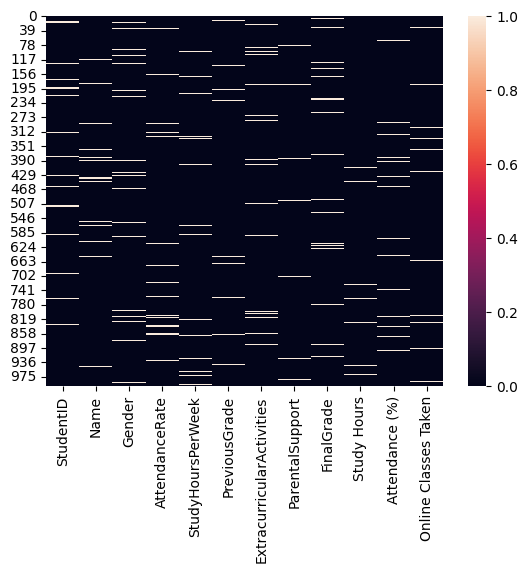

In [32]:
import seaborn as sns

sns.heatmap(df.isnull())

total_missing_ratio = df.isnull().mean()
print(total_missing_ratio.sort_values(ascending=False))

*   Пропуски: присутствуют, наибольшая доля в StudyHoursPerWeek и Gender
*   Стратегия: удалить признаки с очень большим числом пропусков, остальные заполнить медианой (числовые) или модой (категориальные).

# 3. Анализ числовых признаков

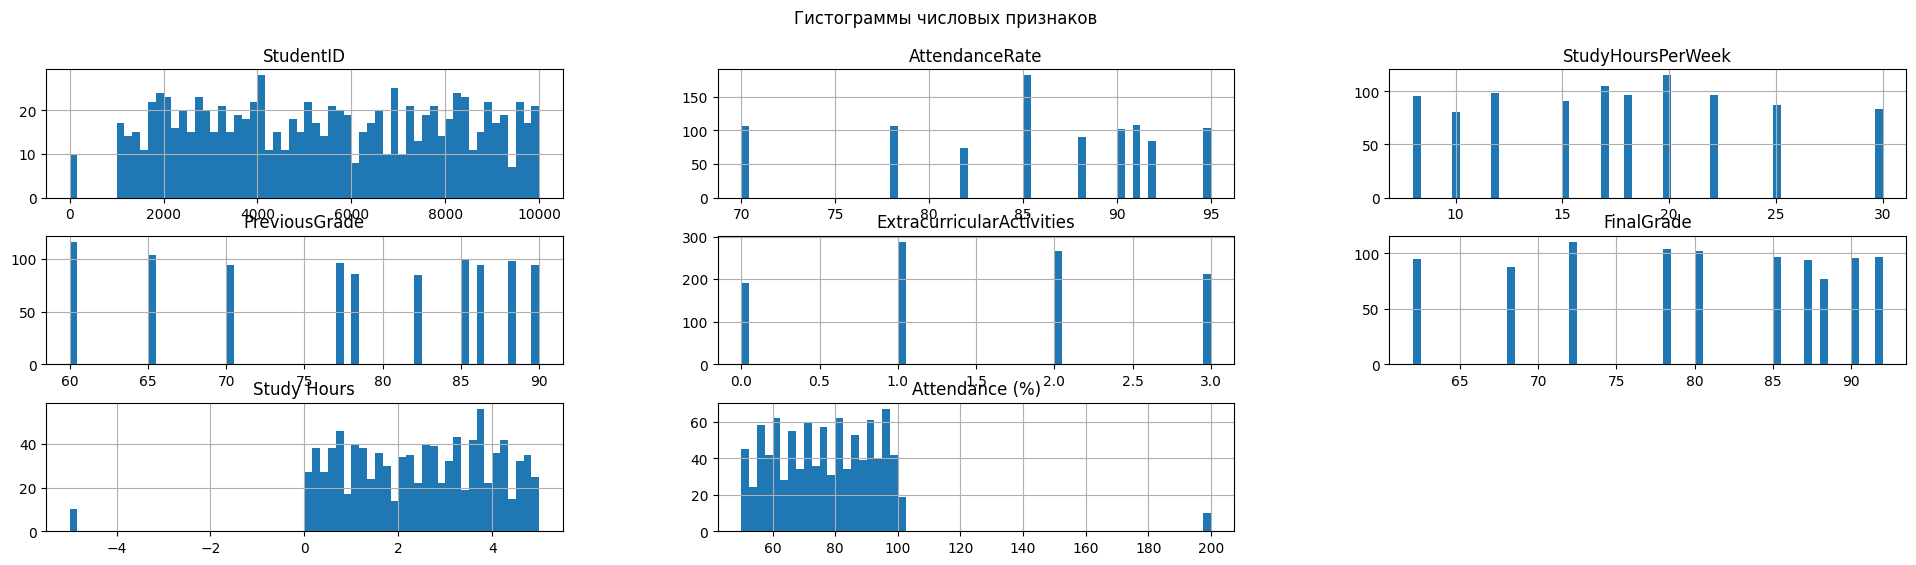

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Определяем числовые признаки
num_cols = df.select_dtypes(include=[np.number]).columns

# Гистограммы для всех числовых признаков
df[num_cols].hist(figsize=(24, 6), bins=60)
plt.suptitle("Гистограммы числовых признаков")
plt.show()

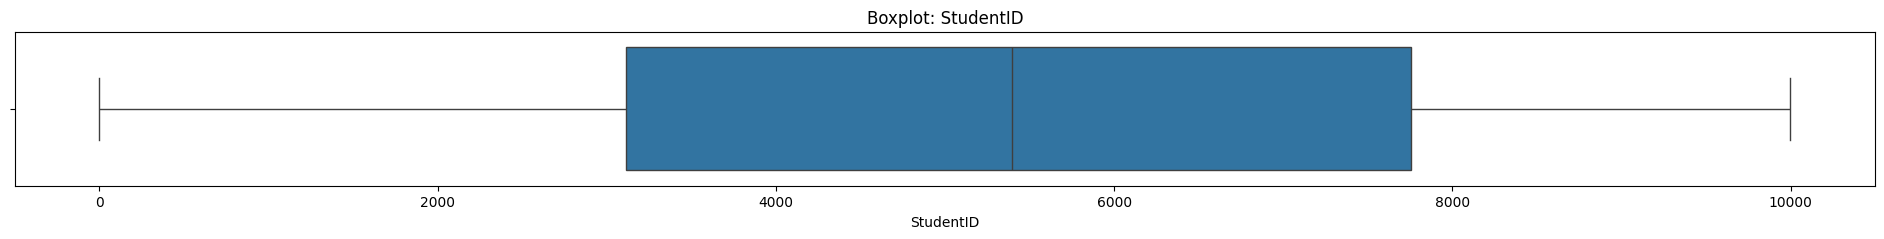

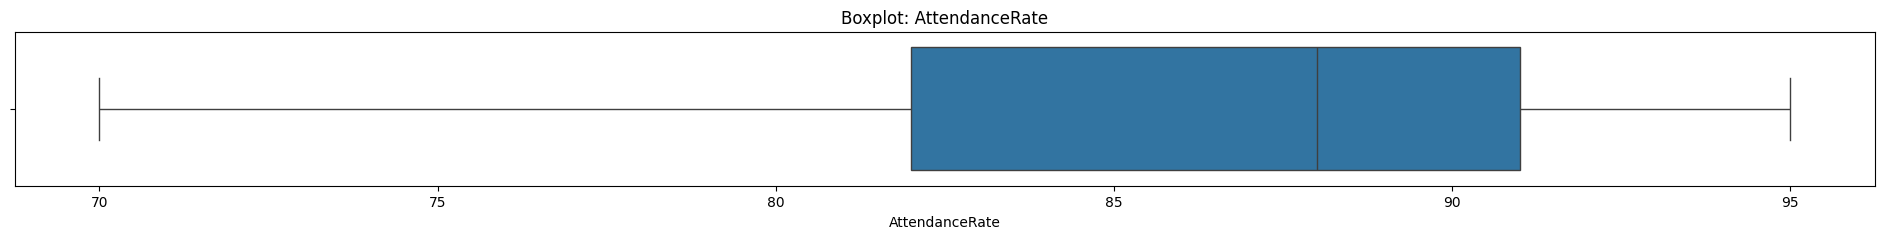

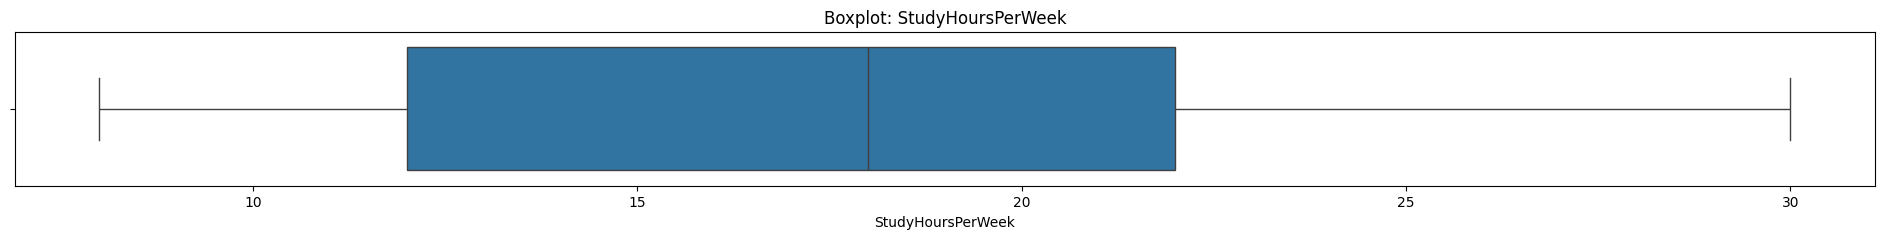

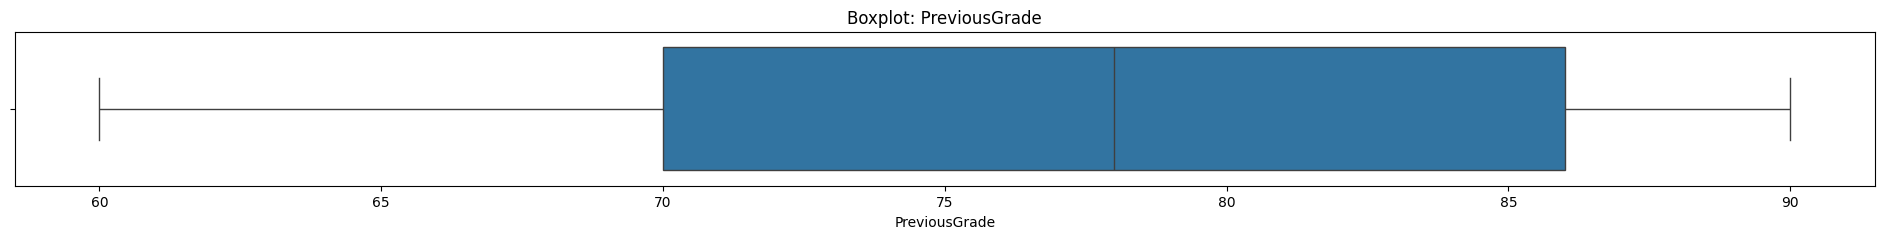

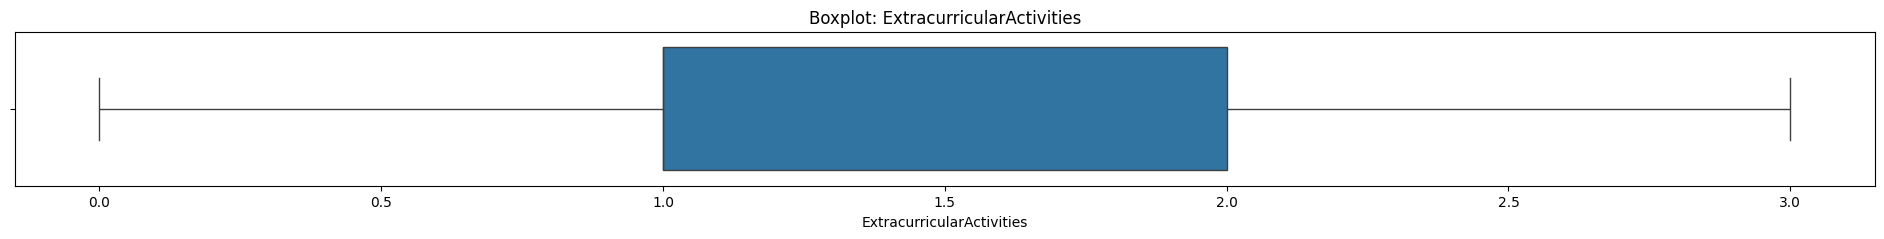

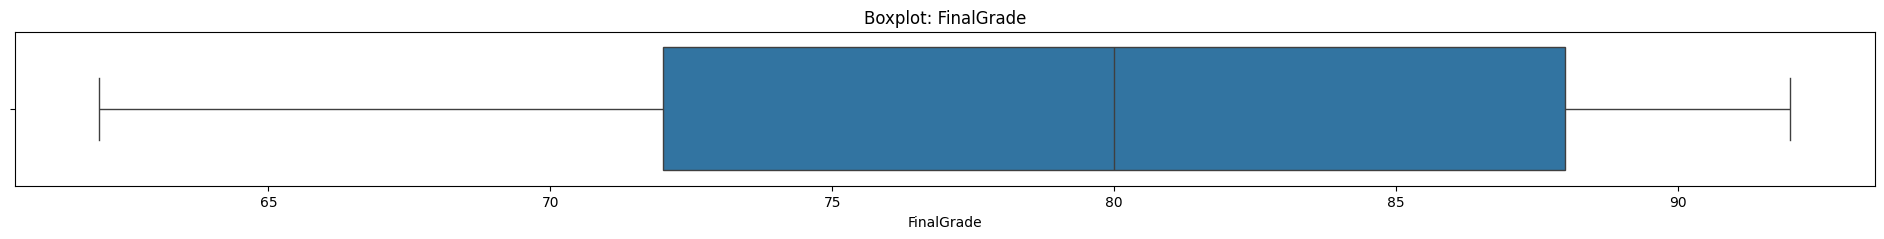

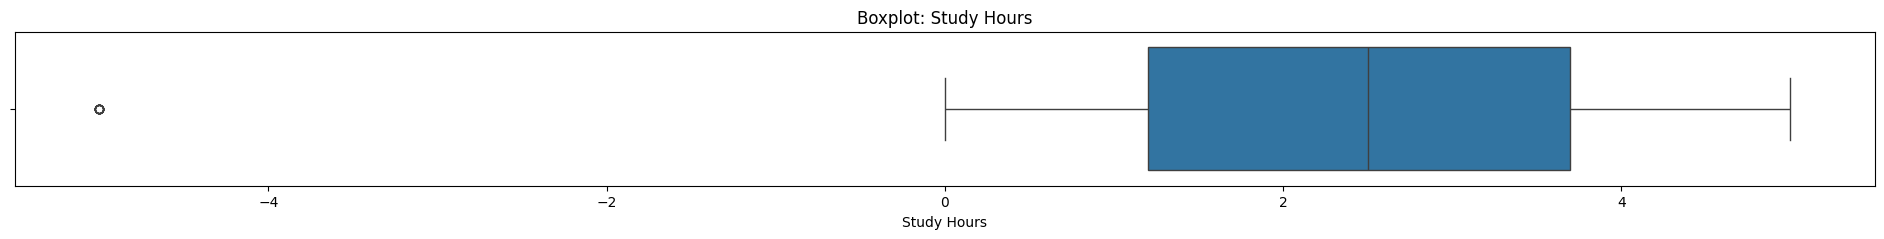

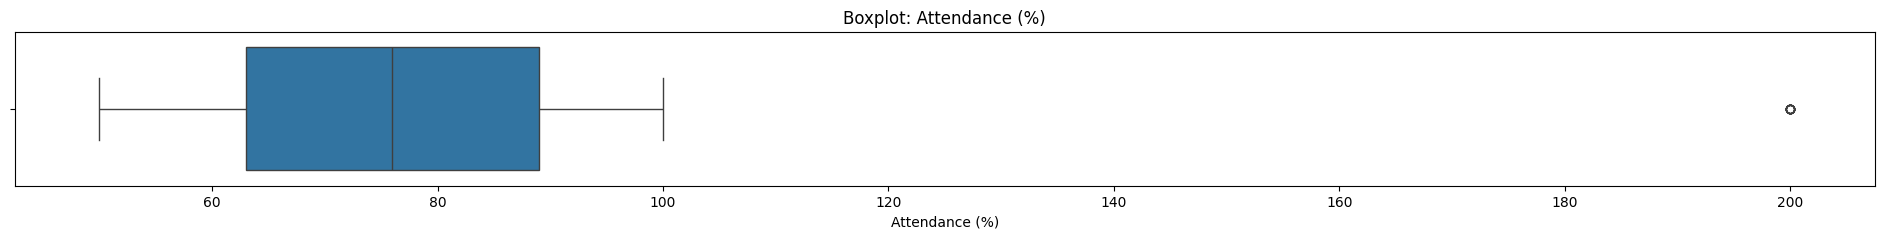

In [61]:
# Boxplot'ы для всех числовых признаков
for col in num_cols:
  plt.figure(figsize=(24, 2))
  sns.boxplot(x=df[col])
  plt.title(f"Boxplot: {col}")
  plt.show()

In [62]:
# Расчитываем статистики
stats = pd.DataFrame({
    "mean": df[num_cols].mean(),
    "median": df[num_cols].median(),
    "std": df[num_cols].std(),
    "skewness": df[num_cols].skew()
})

print("Статистики для числовых признаков:")
print(stats)

Статистики для числовых признаков:
                                  mean  median          std  skewness
StudentID                  5416.019792  5396.5  2653.748319  0.011320
AttendanceRate               85.510417    88.0     7.332125 -0.814382
StudyHoursPerWeek            17.630526    18.0     6.272132  0.259429
PreviousGrade                77.598759    78.0    10.006640 -0.505659
ExtracurricularActivities     1.520376     1.0     1.046439  0.000800
FinalGrade                   80.030208    80.0     9.493652 -0.517401
Study Hours                   2.406967     2.5     1.620267 -0.890628
Attendance (%)               77.248175    76.0    19.298148  2.555723


In [63]:
# Краткий вывод по результатам
for col in num_cols:
    print(f"\nАнализ признака: {col}")
    print(f"- Среднее: {stats.loc[col, 'mean']:.2f}")
    print(f"- Медиана: {stats.loc[col, 'median']:.2f}")
    print(f"- Стандартное отклонение: {stats.loc[col, 'std']:.2f}")
    print(f"- Асимметрия: {stats.loc[col, 'skewness']:.2f}")
    if stats.loc[col, "skewness"] > 0.5:
        print("  → Распределение с правым перекосом (длинный хвост справа).")
    elif stats.loc[col, "skewness"] < -0.5:
        print("  → Распределение с левым перекосом (длинный хвост слева).")
    else:
        print("  → Распределение примерно симметричное.")


Анализ признака: StudentID
- Среднее: 5416.02
- Медиана: 5396.50
- Стандартное отклонение: 2653.75
- Асимметрия: 0.01
  → Распределение примерно симметричное.

Анализ признака: AttendanceRate
- Среднее: 85.51
- Медиана: 88.00
- Стандартное отклонение: 7.33
- Асимметрия: -0.81
  → Распределение с левым перекосом (длинный хвост слева).

Анализ признака: StudyHoursPerWeek
- Среднее: 17.63
- Медиана: 18.00
- Стандартное отклонение: 6.27
- Асимметрия: 0.26
  → Распределение примерно симметричное.

Анализ признака: PreviousGrade
- Среднее: 77.60
- Медиана: 78.00
- Стандартное отклонение: 10.01
- Асимметрия: -0.51
  → Распределение с левым перекосом (длинный хвост слева).

Анализ признака: ExtracurricularActivities
- Среднее: 1.52
- Медиана: 1.00
- Стандартное отклонение: 1.05
- Асимметрия: 0.00
  → Распределение примерно симметричное.

Анализ признака: FinalGrade
- Среднее: 80.03
- Медиана: 80.00
- Стандартное отклонение: 9.49
- Асимметрия: -0.52
  → Распределение с левым перекосом (длинный